<div style="border:solid green 2px; padding: 20px">
<b>Hello, Itay!</b>

My name is Grigoriy Gusarov and I'm going to review your project.

My main goal is not to show that any mistakes have been made somewhere, but to share my experience that will help you in your further work. Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.**


You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for sending your project! Great job, you've submitted very solid research. Please, pay attention to the statistical hypotheses formulations and hardcoding issues.

**Update**:<br>
Thank you for the update! Great job, all issues had been eliminated. Your project has been accepted, congratulations!

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Additional links:
    <ul>
        <li>Plotly cheat sheet: <a>https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf</a></li>
        <li>Pingouin. Sometimes it's more convenient than scipy: <a>https://pingouin-stats.org/#</a></li>
        <li>Sweetviz <a>https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde</a></li>
    </ul>
</div>

---

You work at a startup that sells food products. You need to investigate user behavior for the company's app.

Description of the data:
* EventName — event name
* DeviceIDHash — unique user identifier
* EventTimestamp — event time
* ExpId — experiment number: 246 and 247 are the control groups, 248 is the test group

Research plan:
<a class="anchor" id="table_of_contents"></a>

[table_of_contents](#table_of_contents)

1. [look at general information of the data](#general_information)
    * Load libraries and install packages.
    * Load data
2. [preprocess](#preprocess)
    * [x] Rename the columns in a way that's convenient for you 
    * [x] Check types 
    * [x] Check missing values
    * [x] Look for duplicates
    * [x] Check for anomalies(very larg, very small, incorrect data)
3. [Data analysis:](#Data_analysis)
    * [x] How many events are in the logs?
    * [x] How many users are in the logs?
    * [x] What's the average number of events per user?
    * [x] What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and 
    time. 
    * [x] Did you lose many events and users when excluding the older data?
    * [x] Make sure you have users from all three experimental groups
    
4. [Study the event funnel](#Study_the_event_funnel)

    * [x] See what events are in the logs and their frequency of occurrence. Sort them by frequency.
    * [x] Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.
    * [x] In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
    * [x] Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
    * [x] At what stage do you lose the most users?
    * [x] What share of users make the entire journey from their first event to payment?
    
5. [Study the results of the experiment](#Study_the_results_of_the_experiment)
    * [x] How many users are there in each group?
    * [x] We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
    * [x] Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?
    * [x] Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?
    * [x] What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

<a class='anchor' id='general_information'></a>
[Go back to the Table of Contents](#table_of_contents)
## [look at general information of the data](#general_information)

In [27]:
# !pip install -q --user --upgrade pandas
# !pip install -q --user --upgrade matplotlib
# !pip install -q --user --upgrade seaborn
!pip install -q --user --upgrade plotly

In [28]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [29]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from scipy import stats as st
import math as mth

pd.options.display.max_colwidth = 120

sns.set(rc={"figure.figsize":(10, 6)})


In [30]:
try:
    users_df = pd.read_csv ('/datasets/logs_exp_us.csv', sep='\t')
except:  
    users_df = pd.read_csv ('/datasets/logs_exp_us.csv', sep='\t')

<div class="alert alert-success">
<b>Reviewer's comment:</b> Okay, nice start.
</div>

<a class='anchor' id='preprocess'></a>
[Go back to the Table of Contents](#table_of_contents)
## [preprocess](#preprocess)

In [31]:
users_df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Some obesrvations:
* We see column names are camel cased, we will change it to lower and a dash between
* **EventName** are camel cased, we need to check all values are the same.

----------------
### Rename the columns

In [32]:
users_df.columns = ['event_name','user_id','timestamp','expid']
users_df.head()

,event_name,user_id,timestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<div class="alert alert-warning">
<s><b>Reviewer's comment: </b> Please, pay attention to data frame formatting in your project. Don't forget to use head(), tail(), or sample() when outputting large tables. If you leave everything "as is", when you save the project to github, all the tables will expand to their full length and take up most of the project. Plus, the jupyter notebook wastes extra resources when loading such tables. 
</div>

<div class="alert alert-info"> <b>Student's comment:</b> Thanks for the heads up, added head().</div>

Changed column names.

------------
### Check types

In [33]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event_name    244126 non-null object
user_id       244126 non-null int64
timestamp     244126 non-null int64
expid         244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


* **EventName**: type of event.
* **DeviceDHash**: gives a number for the device to be able to track
* **EventTimestamp**: number that represents date in seconds, **should be converted to proper date time**
* **Expid**: experiment number: 246 and 247 are the control groups, 248 is the test group

----------
**Next** lets fix types.

In [34]:
users_df['timestamp'] = users_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
users_df.head()

,event_name,user_id,timestamp,expid
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


### Check missing values

In [9]:
users_df.isna().sum()

event_name    0
user_id       0
timestamp     0
expid         0
dtype: int64

We have no missing values.

-------------
### Look for duplicates

In [10]:
users_df.duplicated().sum()

413

In [35]:
users_df.duplicated().sum() / len(users_df) * 100

0.16917493425526162

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Hardcoded constant. Please, use variables.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> Fixed hard code issues.</div>

We have 413 duplicated values, since we have 244126 rows and just 413 it affects 0.16% which is very low but let's keep exploring duplicates so we make sure the proportions of experiment group stay the same.

In [36]:
users_duplicated = users_df[users_df.duplicated()]

In [37]:
expid_by_user_id = users_duplicated.drop_duplicates(subset=['user_id']).expid.value_counts() 
expid_by_user_id = expid_by_user_id / users_duplicated.user_id.nunique() * 100 
expid_by_user_id - expid_by_user_id.loc[248]

247    1.265823
248    0.000000
246   -1.265823
Name: expid, dtype: float64

The proprtions difference are very small, close to 1 precent in the duplicates and since we are dealing in just 0.16% of our entire data, removing will not affects our experiments results.

In [38]:
users_df = users_df.drop_duplicates()
print(users_df.duplicated().sum())
users_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
event_name    243713 non-null object
user_id       243713 non-null int64
timestamp     243713 non-null datetime64[ns]
expid         243713 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.3+ MB


### Check for anomalies

In [39]:
users_df.describe(include='all')

,event_name,user_id,timestamp,expid
count,243713,2.437130e+05,243713,243713.000000
unique,5,NaN,176654,NaN
top,MainScreenAppear,NaN,2019-08-01 14:40:35,NaN
freq,119101,NaN,9,NaN
first,NaN,NaN,2019-07-25 04:43:36,NaN
last,NaN,NaN,2019-08-07 21:15:17,NaN
mean,NaN,4.627963e+18,NaN,247.022161
std,NaN,2.642723e+18,NaN,0.824420
min,NaN,6.888747e+15,NaN,246.000000
25%,NaN,2.372212e+18,NaN,246.000000


We have no abnormal dates or wrong values in expid.<br>
We do observe that the earliest date is 2019-07-25.<br>
The latest date is 2019-08-07.

-----
**Next** lets check values in event_name to see if we have abnormal values there.

In [40]:
users_df.event_name.value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

We have 5 values, all with the same camel case pattern and all with reasnobale values.

**Summary:**
* We renamed columns.
* Checked missing values, there were none.
* Looked for duplicates and found 413, made sure removing them will affect our data minamily, removed duplicates.
* Checked for anomalies, values were fine.



<div class="alert alert-success">
<b>Reviewer's comment:</b> Well done, now we are fully prepaired for the further steps.
</div>


<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, add summary for this part.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> Added Summary.</div>


<a class='anchor' id='Data_analysis'></a>
[Go back to the Table of Contents](#table_of_contents)
## [Data analysis:](#Data_analysis)


### How many events are in the logs?

In [41]:
print(users_df.event_name.value_counts())
sum(users_df.event_name.value_counts())

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64


243713

We see the MainScreenAppear is the most frequent event, makes sense since this a user entry point.

Not including the **Tutorial** From there we see a decline in event numbers, make sense since this is what we would expect from a funnel.

-------
### How many users are in the logs?

In [42]:
num_uniqe_users = users_df.user_id.nunique()
num_uniqe_users

7551

Compared to the number of actions <br>
7551 / 243713 * 100 = 3%, makes sense since each user can do a lot of different actions while browsing a website.

-----
### What's the average number of events per user?<br>
The average is the number of actions / number of unique users

In [51]:
events_per_user = len(users_df) / num_uniqe_users
events_per_user

32.27559263673685

32 actions seems about right but we must be carfule about outliers.
Lets look at quantile.

In [44]:
users_events = users_df.groupby('user_id').event_name.count()
users_events = users_events.reset_index()
display(users_events, users_events.event_name.quantile(0.01))
users_events.event_name.quantile(0.99)

,user_id,event_name
0,6888746892508752,1
1,6909561520679493,5
2,6922444491712477,47
3,7435777799948366,6
4,7702139951469979,137
...,...,...
7546,9217594193087726423,9
7547,9219463515465815368,17
7548,9220879493065341500,7
7549,9221926045299980007,7


1.0

200.5

In [45]:
fig = px.violin(users_events, x="event_name", box=True, points='all',
                )
fig.update_layout(
                  title={'text': "Distribution of The Events Counts per User",'y':0.95,'x':0.5,
                         'xanchor': 'center','yanchor': 'top'}
                 )
fig.show()

We have users that preform 1 action and 99 precntile 200 we have even users that preform 2300 (sounds like a bot)<br>
Theses values can skew our data

----
Lets clean and find the avg.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Good point! Since the data is highly skewed it would be necessary to use mode or median.
</div>


In [49]:
def calc_lower_upper_bounds(df, col_name):
    # calculate Q1 and Q3
    Q1 = df[col_name].quantile(.25)
    Q3 = df[col_name].quantile(.75)

    # calculate IQR
    IQR = Q3-Q1
    # calculate upper and lower bounds for outlier detection
    outlier_lower_bound = Q1 - 1.5*IQR
    outlier_upper_bound = Q3 + 1.5*IQR

    print('Lower bound:', outlier_lower_bound) # don't need this, no value is negative
    print('Upper bound:', outlier_upper_bound)
    return {'lower_bound':outlier_lower_bound, 'upper_bound':outlier_upper_bound}

lower_bound, upper_bound = calc_lower_upper_bounds(users_events, 'event_name').values()
filtered_users = users_events.query('event_name < @upper_bound & event_name > @lower_bound')
filtered_users.event_name.mean()


Lower bound: -33.0
Upper bound: 79.0


22.906857873065455

In [52]:
(events_per_user - filtered_users.event_name.mean())/events_per_user

0.29027305150108007

from 32 to about 23 events per user.

This is a big drop, close to 30%, outliers affects our data a lot.


-----
### What period of time does the data cover? 
* Find the maximum and the minimum date. 

In [60]:
print(users_df.timestamp.max())
print(users_df.timestamp.min())
time_diff = users_df.timestamp.max() - users_df.timestamp.min()
time_diff_hours = time_diff / np.timedelta64(1, 'h')
print(time_diff, time_diff_hours)

2019-08-07 21:15:17
2019-07-25 04:43:36
13 days 16:31:41 328.52805555555557


In [61]:
num_uniqe_users / time_diff_hours

22.98433839152922

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> The dame hardcode issue.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> Fixed hard code issue.</div>

We had about 23 users per hour.

------
Lets add a date column.

In [62]:
users_df['date'] = pd.to_datetime(users_df.timestamp.dt.date)
users_df.head()

,event_name,user_id,timestamp,expid,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Lets visualize our number of actions per date.

In [98]:
users_pt_date = users_df.pivot_table(index = 'date', values=['event_name','user_id'], aggfunc={'event_name':'count','user_id':'nunique'})
users_pt_date = users_pt_date.reset_index()
users_pt_date['pos'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
users_pt_date.columns = ['date','event_count','user_count','pos']
x_dates = users_pt_date['date'].dt.strftime('%Y-%m-%d')
display(users_pt_date)


,date,event_count,user_count,pos
0,2019-07-25,9,7,0
1,2019-07-26,31,22,1
2,2019-07-27,55,39,2
3,2019-07-28,105,69,3
4,2019-07-29,184,135,4
5,2019-07-30,412,296,5
6,2019-07-31,2030,924,6
7,2019-08-01,36141,3703,7
8,2019-08-02,35554,3647,8
9,2019-08-03,33282,3482,9


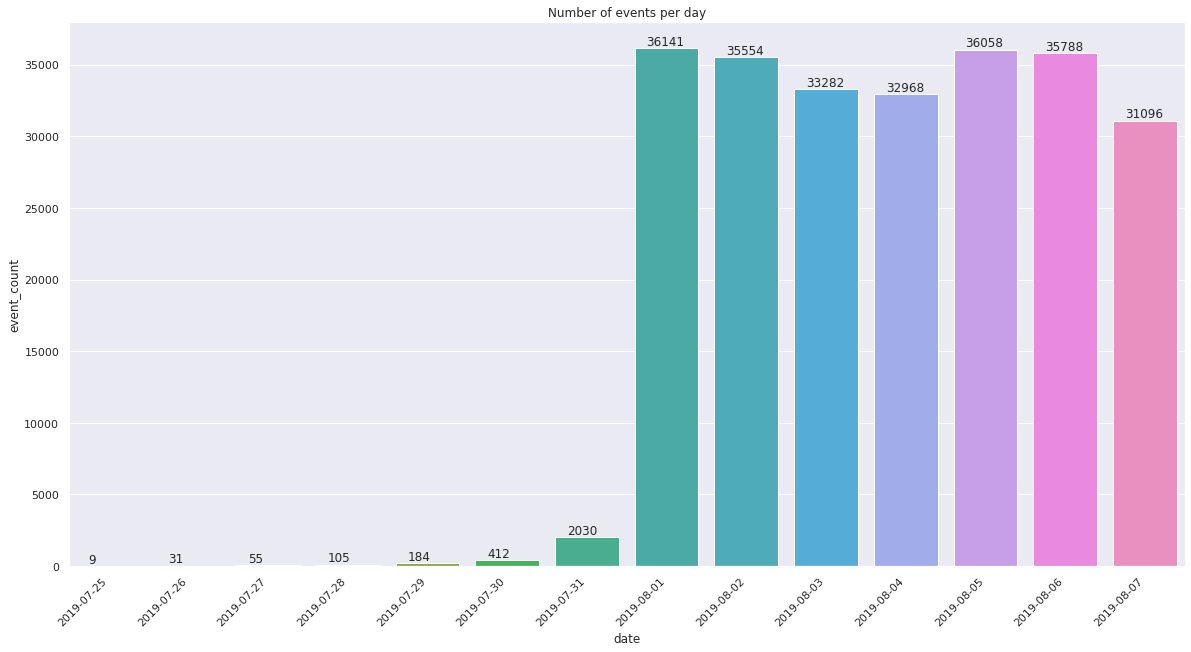

In [109]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = users_pt_date.date, y = users_pt_date.event_count)
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
for row in users_pt_date.itertuples():
    ax.text(row.pos - 0.25, row.event_count + 200 ,s=row.event_count)

plt.title('Number of events per day')
plt.xticks(rotation=45);

We had a big spike in number of actions on 

---
Lets check number of users.

0
1
2
3
4
5
6
7
8
9
10
11
12
13


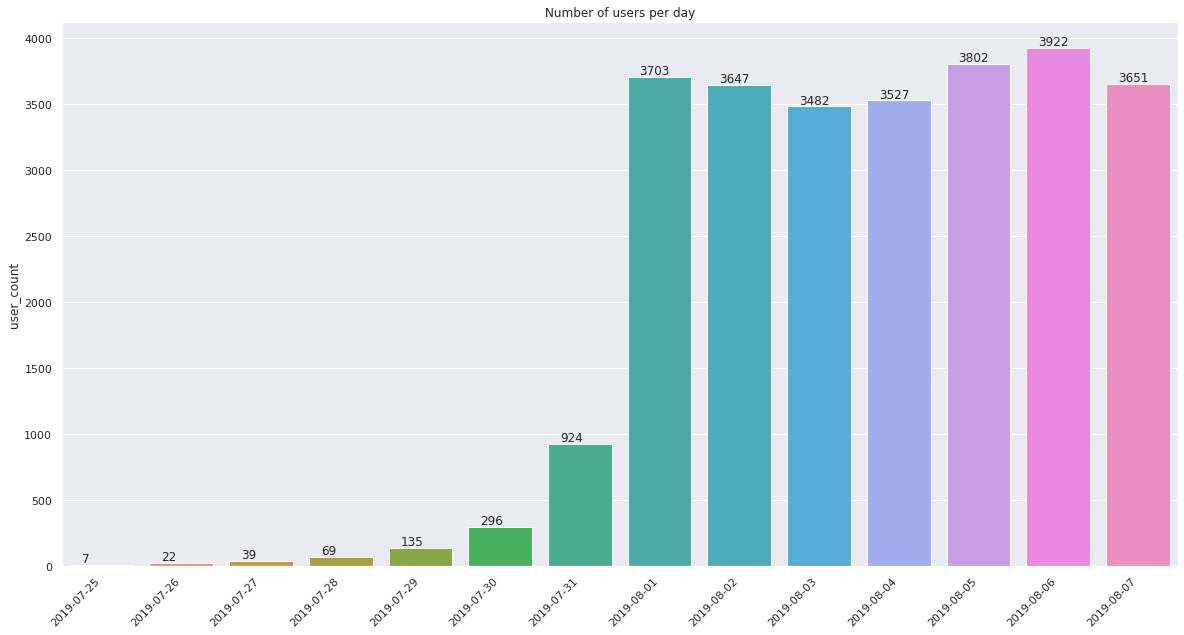

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = users_pt_date.index, y = users_pt_date.user_count)

x_dates = users_pt_date['date'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

for row in users_pt_date.itertuples():
    ax.text(row.pos - 0.25, row.user_count + 20,s=row.user_count)
plt.title('Number of users per day');

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can improve your barplot with values adding. Check this link:<a>https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html</a>
</div>

<div class="alert alert-info">
Added values to bars
</div>

Our take away so far:
We see a big spike on 2019-08-01, in users and actions.

From that date we see the number of actions is close to 10 times the number of users.<br>

--------------
Our experiments require to have data with the same proprtions we see that from 2019-08-01 to 2019-08-08 our data in each date has similar number of users and similar number of event, if we include data prior to 2019-08-01 our experiments might be affected. <br>
We should exclude data from 2019-07-31 (not including) backward,and see how it affects our data.

In [110]:
users_filtered_by_date = users_df[users_df['date'] > '2019-07-31']
display(users_filtered_by_date.head())

# checking to make sure the number of events and users is as expected.
num_events_before = users_pt_date.loc[0:6].event_count.sum()
num_users_before = users_pt_date.loc[0:6].user_count.sum()
print('Number of events before 2019-07-31:',num_events_before)
print('Precentage of number of event filtered:', num_events_before / len(users_df) * 100)
print('Number of users before 2019-07-31:', num_users_before )
print('Percentage of users filtered:', num_users_before / num_uniqe_users * 100)
print('Are the total number of event after filtering is as expected? :',(len(users_df) - num_events_before) == len(users_filtered_by_date))

,event_name,user_id,timestamp,expid,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


Number of events before 2019-07-31: 2826
Precentage of number of event filtered: 1.159560630741897
Number of users before 2019-07-31: 1492
Percentage of users filtered: 19.758972321546814
Are the total number of event after filtering is as expected? : True


<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Result are correct, but again, hardcoded constants 796 and 7551.
</div>

<div class="alert alert-info">
Fixed hard coded issue
</div>

### Did you lose many events and users when excluding the older data?
    
After filtering a concern arises that our prvious question, **Average number of events per user** has a different result.

But since we filtered out 796 which are about 0.32 the affects are neglegible. <br>
Our precentage of users is much bigger, 19.75%.
**We should make sure the proportions of our experiment groups stay close.**

In [111]:
expid_by_user_id = users_filtered_by_date.drop_duplicates(subset=['user_id']).expid.value_counts()
expid_by_user_id = expid_by_user_id / users_filtered_by_date.user_id.nunique() * 100 
expid_by_user_id - expid_by_user_id.loc[248]


248    0.000000
247   -0.318556
246   -0.703478
Name: expid, dtype: float64

First we see we have all three experiment groups.

Next we see the proprtions between the groups are still close, difference is less than 1%.<br>
Since our experiments needs to have statistical significance of more than 1% to 5% our data is still relevent for our experiments.

Lets continue studying the event funnel.

### Conclusion
We made sure we have occurences from all 5 events<br>
After finding the number of users 7551. We found out the average number of events per user,
after excluding outliers we found 23 events per users

In order to work on the experiments we nned to make sure the proportions of our groups are similar, in user size and in events size.<br>
After examing the data, we found that data stabalizes in numbers from 2019-08-01 forward.<br>
We made sure we didn't lose many users less than 1%

<div class="alert alert-success">
<b>Reviewer's comment:</b> Good job, let's look at the funnel analysis.
</div>

<a class='anchor' id='Study_the_event_funnel'></a>
[Go back to the Table of Contents](#table_of_contents)
## [Study the event funnel](#Study_the_event_funnel)

### See what events are in the logs and their frequency of occurrence. Sort them by frequency.

In [112]:
print(users_filtered_by_date.event_name.value_counts())
print(users_filtered_by_date.event_name.value_counts() / users_filtered_by_date.event_name.value_counts().sum() * 100)

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64
MainScreenAppear           48.706655
OffersScreenAppear         19.234330
CartScreenAppear           17.561346
PaymentScreenSuccessful    14.080461
Tutorial                    0.417208
Name: event_name, dtype: float64


As we have seen before we have 5 different values. the most frequent is **MainScreenAppear** 118578.<br>
Make sense since this is our website entery point.<br>
We see the **Tutorial** event has the least number of values, less than 0.5%.

----------------
### Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.


In [117]:
print(users_filtered_by_date.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False))
print('----------------')
print('Precent of users who go through each event')
users_filtered_by_date.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False) / users_filtered_by_date.user_id.nunique() * 100

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64
----------------
Precent of users who go through each event


event_name
MainScreenAppear           98.473586
OffersScreenAppear         60.963632
CartScreenAppear           49.561986
PaymentScreenSuccessful    46.973719
Tutorial                   11.149456
Name: user_id, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can format ratio values as actual percentages: <a>https://stackoverflow.com/a/36175424/11664121</a>. In this case you will alter only a dataframe formatting rules, but not data.
</div>

Since we see **Tutorial** has the least amount in users and in events and more importantly **Tutorial** has no logical flow in our funnel( a user can do a tutorial at each stage), we will remove it.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Yes, that's it.
</div>

In [118]:
sorted_data = users_filtered_by_date[users_filtered_by_date['event_name']!='Tutorial'].sort_values(by=['user_id','timestamp'])
sorted_data.head()

,event_name,user_id,timestamp,expid,date
197263,MainScreenAppear,6888746892508752,2019-08-06 14:06:34,246,2019-08-06
209196,MainScreenAppear,6909561520679493,2019-08-06 18:52:54,247,2019-08-06
209199,PaymentScreenSuccessful,6909561520679493,2019-08-06 18:52:58,247,2019-08-06
209200,CartScreenAppear,6909561520679493,2019-08-06 18:52:58,247,2019-08-06
209201,MainScreenAppear,6909561520679493,2019-08-06 18:52:58,247,2019-08-06


### In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
    

In [116]:
def sequence(df, user):
    sorted_user = df[df['user_id'] == user].sort_values(by = ['user_id','timestamp'])
    return sorted_user['event_name'].drop_duplicates().to_list()

sequence_empty = []
for id in sorted_data.user_id.unique():
    sequence_empty.append([id,sequence(users_filtered_by_date, id)])
    
path_data = pd.DataFrame(sequence_empty,columns = ['user','path'])
path_data.head()

,user,path
0,6888746892508752,[MainScreenAppear]
1,6909561520679493,"[MainScreenAppear, PaymentScreenSuccessful, CartScreenAppear, OffersScreenAppear]"
2,6922444491712477,"[MainScreenAppear, PaymentScreenSuccessful, CartScreenAppear, OffersScreenAppear]"
3,7435777799948366,[MainScreenAppear]
4,7702139951469979,"[MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful]"


In [119]:
path_data['path'].value_counts()

[MainScreenAppear]                                                                             2701
[MainScreenAppear, OffersScreenAppear]                                                          760
[MainScreenAppear, OffersScreenAppear, PaymentScreenSuccessful, CartScreenAppear]               706
[MainScreenAppear, PaymentScreenSuccessful, CartScreenAppear, OffersScreenAppear]               657
[MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful]               652
                                                                                               ... 
[PaymentScreenSuccessful, MainScreenAppear, OffersScreenAppear, CartScreenAppear]                 1
[Tutorial, MainScreenAppear, CartScreenAppear, PaymentScreenSuccessful]                           1
[CartScreenAppear, MainScreenAppear, Tutorial, OffersScreenAppear, PaymentScreenSuccessful]       1
[PaymentScreenSuccessful, OffersScreenAppear, CartScreenAppear, MainScreenAppear]                 1


We can see That usesrs that just enter the website and do nothing else are the most common, people might also enter and go back and forth between events.<br> This list will help us identify weird event flows, like 
**[MainScreenAppear, PaymentScreenSuccessful, CartScreenAppear, OffersScreenAppear]**<br>
We should check if our team to make sure the windows that open automaticly for the users make sense.

### Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
    

In [120]:
funnel_by_groups=[]
for expid in sorted_data.expid.unique():
    group=sorted_data[sorted_data.expid == expid].groupby(['event_name','expid'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
    display(group)
    funnel_by_groups.append(group)

,event_name,expid,user_id
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
0,CartScreenAppear,246,1266
3,PaymentScreenSuccessful,246,1200


,event_name,expid,user_id
1,MainScreenAppear,247,2476
2,OffersScreenAppear,247,1520
0,CartScreenAppear,247,1238
3,PaymentScreenSuccessful,247,1158


,event_name,expid,user_id
1,MainScreenAppear,248,2493
2,OffersScreenAppear,248,1531
0,CartScreenAppear,248,1230
3,PaymentScreenSuccessful,248,1181


In [121]:
funnel_by_groups=pd.concat(funnel_by_groups)
funnel_by_groups

,event_name,expid,user_id
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
0,CartScreenAppear,246,1266
3,PaymentScreenSuccessful,246,1200
1,MainScreenAppear,247,2476
2,OffersScreenAppear,247,1520
0,CartScreenAppear,247,1238
3,PaymentScreenSuccessful,247,1158
1,MainScreenAppear,248,2493
2,OffersScreenAppear,248,1531


In [127]:
fig=px.funnel(funnel_by_groups,x='user_id',y='event_name',color='expid', title='Number of users as passing from events')
fig.show()

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Nice chart, but don't forget about titles :)
</div>

<div class="alert alert-info">
Added title.
</div>

We can see as the users passes each event the number decreases.

### At what stage do you lose the most users?
    

In [39]:
print('drop between event MainScreenAppear -> OfferScreenAppear' ,(2493 - 1531)/ 2493 * 100)

drop between event MainScreenAppear -> OfferScreenAppear 38.5880465302848


We can see how the funnel shows different conversion between events.<br>
Out biggest drop between events is between MainScreenAppear -> OfferScreenAppear almost 39%.

### What share of users make the entire journey from their first event to payment?

In [130]:
total_users_main = funnel_by_groups[funnel_by_groups.event_name == 'MainScreenAppear'].user_id.sum()
total_users_pay = funnel_by_groups[funnel_by_groups.event_name == 'PaymentScreenSuccessful'].user_id.sum()

In [131]:
round(total_users_pay / total_users_main * 100,3)

47.702

47.7% make all the way to payment, 

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Yes, you are right. Please, fix the hardcoded strings.
</div>

<div class="alert alert-info">
Fixed hard code issue.
</div>

### Conclusion
* We saw that MainScreenAppear is the most popular event, which make sense since it is our website entery point.
* We found the number of users who performed each of these actions.
    * **MainScreenAppear**: with ~98% 
    * **PaymentScreenSuccessful**: ~47.7%
    * **Tutorial**: the lowest ~11%
* We found the most popular sequence of events, just entering MainScreenAppear. 
* We found we lost the most users from **MainScreenAppear -> OfferScreenAppear** , a drop of almost 39%.
* Users who reach the **PaymentScreenSuccessful** are 47.7 from the initial event **MainScreenAppear**

<a class='anchor' id='Study_the_results_of_the_experiment'></a>
[Go back to the Table of Contents](#table_of_contents)
## [Study the results of the experiment](#Study_the_results_of_the_experiment)

### How many users are there in each group?

In [132]:
groups_users = pd.pivot_table(users_filtered_by_date, values='user_id', index='expid',aggfunc=pd.Series.nunique).reset_index().sort_values('user_id', ascending=False)
groups_users

,expid,user_id
2,248,2537
1,247,2513
0,246,2484


### We have two control groups in the A/A test, where we check our mechanisms and calculations. 
* See if there is a statistically significant difference between samples 246 and 247.  
* Select the most popular event. 
* In each of the control groups, find the number of users who performed this action. 
* Find their share. Check whether the difference between the groups is statistically significant. 
* Repeat the procedure for all other events (it will save time if you create a special function for this test). 
* Can you confirm that the groups were split properly?

In [133]:
sample_246 = users_filtered_by_date.query('expid == 246')
sample_247 = users_filtered_by_date.query('expid == 247')
sample_248 = users_filtered_by_date.query('expid == 248')

In [134]:
sample_246_pivot = pd.pivot_table(sample_246, values='user_id', index='event_name',aggfunc=pd.Series.nunique).reset_index().sort_values('user_id', ascending=False)
sample_247_pivot = pd.pivot_table(sample_247, values='user_id', index='event_name',aggfunc=pd.Series.nunique).reset_index().sort_values('user_id', ascending=False)
sample_248_pivot = pd.pivot_table(sample_248, values='user_id', index='event_name',aggfunc=pd.Series.nunique).reset_index().sort_values('user_id', ascending=False)

merged_pivot = sample_246_pivot.merge(sample_247_pivot, on='event_name')
merged_pivot = merged_pivot.merge(sample_248_pivot, on='event_name')

merged_pivot.columns = ['event_name', 'users_246', 'users_247', 'users_248']
merged_pivot

,event_name,users_246,users_247,users_248
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [135]:
users_num_246 = groups_users.iloc[2, 1]
users_num_247 = groups_users.iloc[1, 1]
users_num_248 = groups_users.iloc[0, 1]

In [136]:
def z_test(event_name, event_nums, users_nums,alpha = .003 ):
    #alpha = .01 
#     alpha = .003

    print(event_name)

    event_nums = np.array(event_nums)
    users_nums = np.array(users_nums)

    p1 = event_nums[0]/users_nums[0]

    p2 = event_nums[1]/users_nums[1]

    p_combined = (event_nums[0] + event_nums[1]) / (users_nums[0] + users_nums[1])

    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users_nums[0] + 1/users_nums[1]))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 
    print('-' * 100)

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, use alpha as the function's parameter.
</div>

H0: The proportions of 246 and 247 samples are don't have statistical insignificant difference.

H1: The proportions of 246 and 247 samples do have statistical insignificant difference.

The alpha is 0.003

<div class="alert alert-danger">
<s><b>Reviewer's comment v2:</b> Pay attention, that "equal" conception is not appliable in case of distributions. Please, use "statistical insignificant difference". Also, you need to specify alpha value. 
</div>

In [137]:
for i in range(len(merged_pivot)):
    event_name = merged_pivot.iloc[i,0]
    events_nums_246_247 = [merged_pivot.iloc[i,1], merged_pivot.iloc[i,2]]
    users_nums_246_247 = [users_num_246, users_num_247]
    z_test(event_name, events_nums_246_247, users_nums_246_247)

MainScreenAppear
p-value:  0.7570597232046099
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
OffersScreenAppear
p-value:  0.2480954578522181
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
CartScreenAppear
p-value:  0.22883372237997213
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
PaymentScreenSuccessful
p-value:  0.11456679313141849
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
Tutorial
p-value:  0.

We failed to reject any of the null hypotheses. There isn't a significant difference between the proportions of 246 and 247 samples.

------------
### Do the same thing for the group with altered fonts. 
* Compare the results with those of each of the control groups for each event in isolation. 
* Compare the results with the combined results for the control groups. 
* What conclusions can you draw from the experiment?

H0: The proportions of 246 and 248 samples are equal.

H1: The proportions of 246 and 248 samples are not equal.

In [47]:
for i in range(len(merged_pivot)):
    event_name = merged_pivot.iloc[i,0]
    events_nums_246_248 = [merged_pivot.iloc[i,1], merged_pivot.iloc[i,3]]
    users_nums_246_248 = [users_num_246, users_num_248]
    z_test(event_name, events_nums_246_248, users_nums_246_248)

MainScreenAppear
p-value:  0.2949721933554552
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
OffersScreenAppear
p-value:  0.20836205402738917
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
CartScreenAppear
p-value:  0.07842923237520116
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
PaymentScreenSuccessful
p-value:  0.2122553275697796
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
Tutorial
p-value:  0.

We failed to reject any of the null hypotheses. There isn't a significant difference between the proportions of 246 and 248 samples.

-----
H0: The proportions of 247 and 248 samples are equal.

H1: The proportions of 247 and 248 samples are not equal.

In [48]:
for i in range(len(merged_pivot)):
    event_name = merged_pivot.iloc[i,0]
    events_nums_247_248 = [merged_pivot.iloc[i,2], merged_pivot.iloc[i,3]]
    users_nums_247_248 = [users_num_247, users_num_248]
    z_test(event_name, events_nums_247_248, users_nums_247_248)

MainScreenAppear
p-value:  0.4587053616621515
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
OffersScreenAppear
p-value:  0.9197817830592261
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
CartScreenAppear
p-value:  0.5786197879539783
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
PaymentScreenSuccessful
p-value:  0.7373415053803964
Failed to reject the null hypothesis: there is no reason to consider the proportions different
----------------------------------------------------------------------------------------------------
Tutorial
p-value:  0.76

<div class="alert alert-success">
<b>Reviewer's comment:</b> Good, all test are correct.
</div>

We failed to reject any of the null hypotheses. There isn't a significant difference between the proportions of 247 and 248 samples.

----

### What significance level have you set to test the statistical hypotheses mentioned above? 
* Calculate how many statistical hypothesis tests you carried out. 
* With a statistical significance level of 0.1, one in 10 results could be false. 
* What should the significance level be? 
* If you want to change it, run through the previous steps again and check your conclusions.

We carried out 15  statistical hypothesis tests. We can use the Bonferroni correction: α = α/m. 

So if we want a significance level of 0.05, the α should be 0.05 / 15 = 0.003 

-----
### Conclusion
* We found the number of users in each group.
* There isn't a statistically significant difference between samples 246 and 247.
* We found the number of users who performed this action.
* The groups were split properly.
* There isn't a statistically significant difference between samples 246 and 248 or between 247 and 248.
* The group with altered fonts doesn't have an advantage over the control groups.
* We carried out 15 statistical hypothesis tests. We started with significance level of 0.05 and ended with 0.003. We didn't find any statistical significance between the groups.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Great that you are already familiar with the Bonferroni correction. It can save you from the false negative error, but on the other hand, this correction is too strict. It's almost impossible to reject H0 hypotheses with it. Thus, we usually use other corrections for real tasks.  You can read about them here: <br>
<a>http://jpktd.blogspot.com/2013/04/multiple-testing-p-value-corrections-in.html</a>    
</div>

## General Conclusion:
* We cleaned the data and made sure eveything was in order.
* We split the groups and made sure the proportions between the groups stay similar.
* There isn't a statistically significant difference between samples 246 and 248 or between 247 and 248.
* The group with altered fonts doesn't have an advantage over the control groups.
* We carried out 15 statistical hypothesis tests. We started with significance level of 0.05 and ended with 0.003. We didn't find any statistical significance between the groups.

For these reasons, I don't recommend to change the fonts.

<div class="alert alert-success">
<b>Reviewer's comment:</b> Thank you for the research!
</div>

<div class="alert alert-info">
Fixed the issues in this note book, hope it's what you requested.
    
Thanks for your time and patience Grigoriy
</div>
